# <center>ISN1 TD4 - Conditionnelles, boucles et fonctions simples</center>

#### Compétences visées
- Savoir implémenter une boucle for et une boucle while
- Etre capable de choisir le type de boucle approprié
- Ecrire un algorithme en langage naturel à partir d'un énoncé et savoir l’implémenter
- Ecrire une fonction simple et l’appeler dans un code 

## Exercice 1 - Mais où est le lapin ? 

Codez ici votre jeu du lapin du TD3. Vérifiez qu'il fonctionne bien.

In [ ]:
from math import sqrt
from random import randint


def calcul_d(c_l, c_j):
    return sqrt((c_l[0]-c_j[0])**2 + (c_l[1]-c_j[1])**2)

n = 10

c_lapin = (randint(0, n),randint(0, n))
c_jou = [0, 0]

d = calcul_d(c_lapin, c_jou)

while d != 0:
    c_jou[0]= int(input("Coordonnée x : \n> "))
    c_jou[1]= int(input("Coordonnée y : \n> "))
    d = calcul_d(c_lapin, c_jou)
    print(d)
print(f"Bravo, tu as trouvé le lapin ({c_lapin[0]}, {c_lapin[1]})")

## Exercice 2 - Nombre d'Or
Comme vu dans le TD précédent, le nombre d'or $\phi$ est l'unique solution de l'équation $x^2 = x + 1$. Sa valeur exacte est $\frac{1+\sqrt 5}{2}$ soit approximativement 1.618034. Il correspond à la valeur asymptotique de la suite définie comme suit :

$$
	u_0 = 1\\
	u_{n+1} = 1+\frac{1}{u_{n}}
$$


---
### Cas 1 : le nombre d'itérations est connu

#### Q1. Dans la cellule ci-dessous, écrire votre code issu du TD précédent (Q5.1) pour calculer les `nb_iter` premiers termes de la suite ci-dessus afin d'approximer la valeur de $\phi$. Vérifiez qu'il fonctionne.

In [ ]:
def nb_or(n):
    u = 1
    for _ in range(1, n + 1):
        u = 1 + 1/u
    return u

print(nb_or(1000))

### Q2. Ecrivez une fonction `affiche_convergence_nb_or` qui prend en paramètre les listes `liste_n` des valeurs de n et `liste_un` des valeurs de un et affiche la courbe d'évolution de $un$.

In [ ]:
import matplotlib.pyplot as plt
def affiche_convergence_nb_or(liste_n, liste_un):
    fig, ax = plt.subplots() # Création de la figure (fig) et des axes (ax) de la figure
    ax.plot(liste_n, liste_un)           # Création de la courbe sur les axes de la figure

    ax.set(xlabel='n', ylabel='u_n', title='')  # Ajout de la légende des axes et d'un titre
    plt.show()  # Affichage de la figure 

### Q3. Modifiez le code de la question 1 afin d'utiliser votre fonction pour afficher la courbe d'évolution de un pour `nb_iter = 30`.

In [ ]:
import matplotlib.pyplot as plt
def affiche_convergence_nb_or(liste_n, liste_un):
    fig, ax = plt.subplots() # Création de la figure (fig) et des axes (ax) de la figure
    ax.plot(liste_n, liste_un)           # Création de la courbe sur les axes de la figure

    ax.set(xlabel='n', ylabel='u_n', title='')  # Ajout de la légende des axes et d'un titre
    plt.show()  # Affichage de la figure 

def valeur_un(n):
    liste_un = []
    for i in range(1, n + 1):
        liste_un.append(nb_or(i))
    return liste_un

nb_iter = 30
liste_n = range(1, nb_iter + 1)

affiche_convergence_nb_or(liste_n, valeur_un(nb_iter))

---
### Cas 2 : on s'arrête quand on est proche de $\phi$

On souhaite maintenant calculer les termes successifs de la suite jusqu’à ce que la valeur $u_n$ de la suite soit proche à une précision $\epsilon$ près de la valeur de $\phi$, c'est-à-dire que la condition suivante soit vraie  : 

$| u_n − \phi| < \epsilon$

#### Q2. Écrire un code calculant et affichant les différentes valeurs de la suite jusqu'à convergence (lorsque la condition est vraie) pour une valeur de précision donnée. Tester le code pour différentes précisions (e.g. $10^{−2}$, $10^{−6}$, ...). Plus la précision est petite, plus le résultat doit être proche de la valeur du nombre d'or.

In [ ]:
from math import sqrt

def approx(epsilon):
    i = 1
    n_or = (1+sqrt(5))/2
    while abs(nb_or(i) - n_or) >= epsilon:
        i += 1
    return i

print(approx(10e-6))

---
### Cas 3 : on s'arrête quand la suite "ne bouge plus beaucoup"

On fait maintenant l’hypothèse que l’on ne connaît pas la valeur exacte de $\phi$. Par contre, une étude approfondie permettrait de montrer que la suite oscille de plus en plus près de sa valeur asymptotique $\phi$ (on dit que la suite $u_n − \phi$ est une suite alternée, convergeant asymptotiquement vers 0 et absolument strictement monotone).

La condition d'arrêt devient dans ce cas :

$|u_n - u_{n-1}| < \epsilon$

#### Q3. Proposez un code réalisant cet objectif pour différentes précisions : $10^{−2}$, $10^{−6}$, etc.

In [ ]:
def approx_or(epsilon):
    n = 1
    while abs(nb_or(n) - nb_or(n-1)) > epsilon:
        n += 1
    return n, nb_or(n)
print(approx_or(1e-6))

&nbsp;
---
---
&nbsp;
## Exercice 2 - Jeu du nombre secret

Ce jeu radiophonique, célèbre dans les années 70, demandait à un maximum de 10 auditeurs au téléphone de deviner un nombre compris entre 1 et 999 de la façon suivante : le premier proposait un nombre et l’animateur répondait "plus petit" ou "plus grand" selon que le nombre proposé était plus petit ou plus grand que le nombre secret ; le second poursuivait en proposant un autre nombre, en s’aidant de la réponse faite au premier ; le jeu continuait ainsi jusqu’à ce qu’un auditeur trouve le nombre secret, et gagnait alors les 10000 Francs, ou que les 10 auditeurs aient été interrogés, auquel cas personne ne gagnait.

#### Q1. Écrire un algorithme de ce jeu en pseudo-code dans lequel le rôle de l'animateur est tenu par l'ordinateur et celui des auditeurs par l'utilisateur. Puis, faites le tester par un de vos camarades.
~~~
n <- nombre aléatoire positif
user <- -1
tant que n != user:
    user <- demander nombre utilisateur
    si user < n:
        afficher "c'est plus"
    sinon si user > n:
        afficher "c'est moins"
afficher "Vous avez gagné"
~~~

---
#### Q2. Implémentez votre algorithme en Python

<u>Rappel</u> : La fonction `randint` du module [random](https://docs.python.org/3/library/random.html) de la bibliothèque standard Python permet de tirer un nombre entier aléatoire compris entre 2 valeurs données. Allez vérifiez dans la documentation si les bornes sont inclues ou exclues.

In [ ]:
from random import randint as rd
n = rd(1, 999)
user = -1
while n != user:
    user = int(input("Entrez un nombre \n> "))
    if user < n:
        print("c'est plus")
    elif user > n:
        print("c'est moins")
        
print("Vous avez gagné")

---
Il est possible de trouver automatiquement la bonne valeur avec le **principe de dichotomie** : à chaque itération, on coupe l’intervalle en 2 intervalles de tailles égales et on regarde dans quel intervalle se trouve le nombre recherché (en le comparant avec la valeur du milieu), si on n'a pas trouvé la valeur, on fait une nouvelle itération dans lequel le nouvel intervalle est donc la moitié du précédent.

#### Q3. Écrivez maintenant le jeu inverse : Écrivez un algorithme en pseudo-code où un humain choisi une valeur entre 1 et 999, puis l'ordinateur cherche la valeur cachée en utilisant le principe de dichotomie. Affichez à la fin le nombre d'itérations nécessaires pour trouver le nombre secret.

~~~md
n <- demander nombre
guess <- 500
tant que guess != n:
    si guess < n:
        guess += (guess/2)
    sinon si guess > n:
        guess -= (guess/2)
    afficher guess
afficher "le nombre est : "
~~~

---
#### Q4. Implémentez votre algorithme et vérifiez qu'il fonctionne correctement

In [74]:
n = int(input("nombre \n> "))
a = 0
b = 1000
while a <= b:
    guess = (a + b) // 2
    print(f"Proposition : {guess}")
    print(a,b)
    if guess < n:
        a = guess + 1
    elif guess > n:
        b = guess - 1
    else:
        print(f"Le nombre est : {guess}")
        break
else:
    print("Le nombre n'a pas été trouvé.")

nombre 
> 220
Proposition : 500
0 1000
Proposition : 249
0 499
Proposition : 124
0 248
Proposition : 186
125 248
Proposition : 217
187 248
Proposition : 233
218 248
Proposition : 225
218 232
Proposition : 221
218 224
Proposition : 219
218 220
Proposition : 220
220 220
Le nombre est : 220


&nbsp;
---
---

# Devoirs pour la prochaine séance
### Faire l'exercice 1 du TD5 sur papier

&nbsp;
---
---
# Pour s'entrainer

## Exercice A - Suite de Syracuse

On considère la **suite de Syracuse**, définie par la relation de récurrence suivante :

\begin{equation*}
u_{n+1} = \left\{ \begin{array}{ll}
\frac{u_n}{2}, & (\text{si $u_n$ est pair}) \\
3 u_{n} +1, & (\text{si $u_n$ est impair})
\end{array} \right.
\end{equation*}

Il a été trouvé expérimentalement (mais jamais démontré) que, pour $n$ suffisamment grand, $u_n$ oscille entre les valeurs 1, 4 et 2. Cette propriété semble vraie pour tout entier strictement positif $u_0$ (on dit que le bassin d’attraction de l’orbite périodique $1 \rightarrow 4 \rightarrow 2$ est $\mathbb N^\star$).

#### Q1. Proposez la fonction `syracuse_suiv` qui permet de calculer $u_{n+1}$ à partir de $u_n$.

In [96]:
def syracuse_suiv(u_n):
    r = 0
    if u_n % 2 == 0:
        r = u_n / 2
    else:
        r = 3*u_n + 1
    return r

nb_iter = 100
u = 50
liste = [u]
for _ in range(nb_iter):
    u = syracuse_suiv(u)
    liste.append(u)

#### Q2. Proposez un code qui calcule et affiche les `nb_iter` premiers termes de la suite de Syracuse. On posera $u_0 = 50$. Vous testerez le programme pour différentes valeurs de `nb_iter`.

### Q3. Modifiez votre code précédent afin d'afficher l'évolution de la suite de Syracuse en fonction des itérations. Vous devez observer l'oscillation entre les trois valeurs 1, 4, 2.

#### Q3. Proposez un code qui calcule et affiche les termes de la suite de Syracuse jusqu'à obtenir 1. On posera encore $u_0 = 50$.

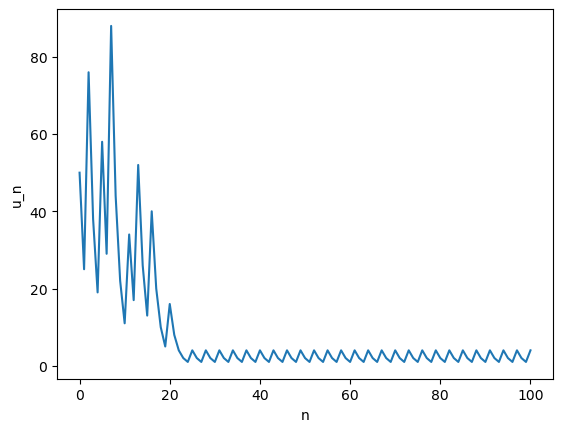

In [97]:
def affiche_syracuse(liste):
    fig, ax = plt.subplots() # Création de la figure (fig) et des axes (ax) de la figure
    ax.plot(list(range(0, nb_iter + 1)), liste)           # Création de la courbe sur les axes de la figure

    ax.set(xlabel='n', ylabel='u_n', title='')  # Ajout de la légende des axes et d'un titre
    plt.show()  # Affichage de la figure 

affiche_syracuse(liste)